#Daily Challenge :
##Comprehensive Mobile Price Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Data Loading and Exploration**

- Utilize Pandas to load the dataset and explore its initial structure.
- Summarize features, target variable, and their respective data types.
- Conduct basic descriptive statistics for an overview of the dataset.

In [2]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range\n842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1\n1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2\n563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2\n615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2\n1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1\n1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1\n1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3\n1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0\n1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0\n509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0\n769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0,3\n1520,1,2.2,0,5,1,33,0.5,177,8,18,151,1005,3826,14,9,13,1,1,1,3\n1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1\n803,1,

In [4]:
train = pd.read_csv('train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

we can see that there is no missing data, and also no objects. All the columns have numbers (integers and floars)

In [7]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

**Data Cleaning and Preprocessing:
Address missing or null values.
Transform categorical data into numerical format using suitable methods.**


In [10]:
train.duplicated().sum()


np.int64(0)

In [11]:
train.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


the data set contains no duplicates

###there is no need to address missing or null values since all the data is complete. Also there is no need to convert any categorical data into numerical format since all data is already numercial

**Statistical Analysis with NumPy and SciPy:**

Execute detailed statistical analysis on each feature, including:
- Calculation of central tendency measures (mean, median, mode).
- Analysis of variability (range, variance, standard deviation).
- Evaluation of distribution shapes through skewness and kurtosis.
- Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
- Investigate feature-target correlations using SciPy.
- Apply advanced SciPy statistical functions for deeper insights.



In [6]:
# Filter out categorical features
train_categorical = train[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)

# Calculate number of unique values and unique values for each feature
unique_counts = train_categorical.nunique()
unique_values = train_categorical.apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


In [13]:
# Filter out numerical features
df_numerical = train.drop(train_categorical.columns, axis=1)

# Generate descriptive statistics
df_numerical.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
pc,2000.0,9.9,6.1,0.0,5.0,10.0,15.0,20.0
px_height,2000.0,645.1,443.8,0.0,282.8,564.0,947.2,1960.0
px_width,2000.0,1251.5,432.2,500.0,874.8,1247.0,1633.0,1998.0
ram,2000.0,2124.2,1084.7,256.0,1207.5,2146.5,3064.5,3998.0


Here we can see all the statistics on all columns when dropping all categorical columns. This gives us a better understanding in a statistical way.

In [14]:
print("Variability Analysis:\n")
for column in df_numerical.columns:
    col_range = df_numerical[column].max() - df_numerical[column].min()
    col_variance = df_numerical[column].var()
    col_std_dev = df_numerical[column].std()
    print(f"Feature: {column}")
    print(f"  Range: {col_range:.2f}")
    print(f"  Variance: {col_variance:.2f}")
    print(f"  Standard Deviation: {col_std_dev:.2f}")
    print("\n")

Variability Analysis:

Feature: battery_power
  Range: 1497.00
  Variance: 193088.36
  Standard Deviation: 439.42


Feature: clock_speed
  Range: 2.50
  Variance: 0.67
  Standard Deviation: 0.82


Feature: fc
  Range: 19.00
  Variance: 18.85
  Standard Deviation: 4.34


Feature: int_memory
  Range: 62.00
  Variance: 329.27
  Standard Deviation: 18.15


Feature: m_dep
  Range: 0.90
  Variance: 0.08
  Standard Deviation: 0.29


Feature: mobile_wt
  Range: 120.00
  Variance: 1253.14
  Standard Deviation: 35.40


Feature: pc
  Range: 20.00
  Variance: 36.78
  Standard Deviation: 6.06


Feature: px_height
  Range: 1960.00
  Variance: 196941.41
  Standard Deviation: 443.78


Feature: px_width
  Range: 1498.00
  Variance: 186796.36
  Standard Deviation: 432.20


Feature: ram
  Range: 3742.00
  Variance: 1176643.61
  Standard Deviation: 1084.73


Feature: sc_h
  Range: 14.00
  Variance: 17.75
  Standard Deviation: 4.21


Feature: sc_w
  Range: 18.00
  Variance: 18.98
  Standard Deviation: 4.36

This shows the range, variance and standard deviation for the numerical features.

The Range shows the difference between the maximum and minimum values for each feature, indicating the spread of the data.

The variance measures how spread out of the data is from the mean. A higher variance indicates that the data points are more dispersed.

The standard deviation is the square roo of the variance and is often easier to interpret as it is in the same units as the data. Some features, like 'ram', 'px_height', and 'battery_power' show relatively high standart deviations, implying significant variation in these aspects among the mobile phones.

In [15]:
print("Distribution Shape Analysis (Skewness and Kurtosis):\n")
for column in df_numerical.columns:
    col_skewness = df_numerical[column].skew()
    col_kurtosis = df_numerical[column].kurt()
    print(f"Feature: {column}")
    print(f"  Skewness: {col_skewness:.2f}")
    print(f"  Kurtosis: {col_kurtosis:.2f}")
    print("\n")

Distribution Shape Analysis (Skewness and Kurtosis):

Feature: battery_power
  Skewness: 0.03
  Kurtosis: -1.22


Feature: clock_speed
  Skewness: 0.18
  Kurtosis: -1.32


Feature: fc
  Skewness: 1.02
  Kurtosis: 0.28


Feature: int_memory
  Skewness: 0.06
  Kurtosis: -1.22


Feature: m_dep
  Skewness: 0.09
  Kurtosis: -1.27


Feature: mobile_wt
  Skewness: 0.01
  Kurtosis: -1.21


Feature: pc
  Skewness: 0.02
  Kurtosis: -1.17


Feature: px_height
  Skewness: 0.67
  Kurtosis: -0.32


Feature: px_width
  Skewness: 0.01
  Kurtosis: -1.19


Feature: ram
  Skewness: 0.01
  Kurtosis: -1.19


Feature: sc_h
  Skewness: -0.10
  Kurtosis: -1.19


Feature: sc_w
  Skewness: 0.63
  Kurtosis: -0.39


Feature: talk_time
  Skewness: 0.01
  Kurtosis: -1.22




*Skewness* measures the asymmetry of the probability distribution of the data.

- A value close to 0 indicates a symmetrical distribution (like a normal bell curve).

- Positive skewness means the distribution has a longer tail on the right side.

- Negative skewness means it has a longer tail on the left side.

*Kurtosis* measures the 'tailedness' of the distribution.

- A high kurtosis value indicates a distribution with heavy tails (more outliers).

- A low kurtosis value indicates a distribution with light tails (fewer outliers).

Performing a hypothesis testing for statistical significance between groups:
- different price ranges

In [16]:
ram_by_price_range = {}
for price_range_val in sorted(train['price_range'].unique()):
    ram_values = train[train['price_range'] == price_range_val]['ram'].tolist()
    ram_by_price_range[price_range_val] = ram_values

for key, value in ram_by_price_range.items():
    print(f"Price Range {key}: {len(value)} samples")


Price Range 0: 500 samples
Price Range 1: 500 samples
Price Range 2: 500 samples
Price Range 3: 500 samples


In [17]:
from scipy.stats import f_oneway

# Extract ram values for each price range
ram_group0 = ram_by_price_range[0]
ram_group1 = ram_by_price_range[1]
ram_group2 = ram_by_price_range[2]
ram_group3 = ram_by_price_range[3]

# Perform One-Way ANOVA test
f_statistic, p_value = f_oneway(ram_group0, ram_group1, ram_group2, ram_group3)

# Print the results
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3e}")

F-statistic: 3520.11
P-value: 0.000e+00


**Reasoning**:
To visually compare the distribution of 'ram' for each 'price_range', here is a box plot using seaborn. This will provide a clear graphical representation of the differences found in the ANOVA test.



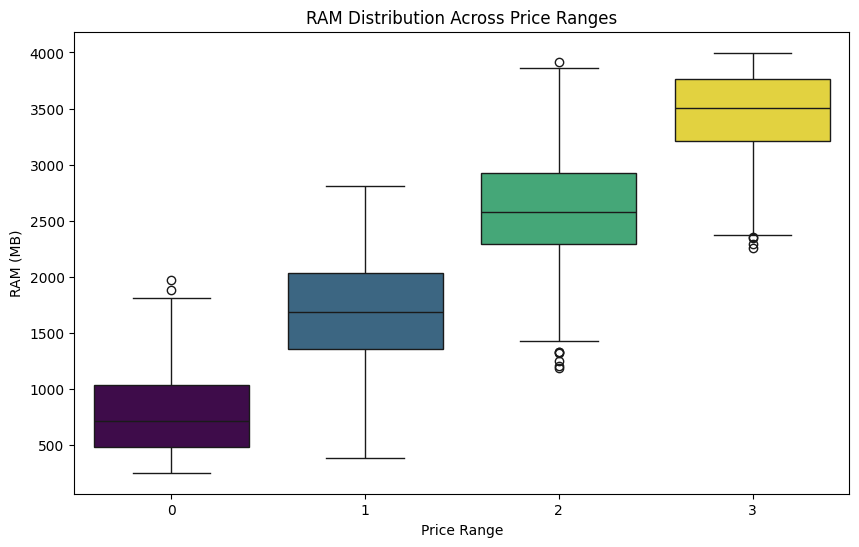

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=train, palette='viridis', hue='price_range', legend=False)
plt.title('RAM Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

**Reasoning**:
First, I'll prepare a list of feature columns from the `train` DataFrame, excluding the target variable 'price_range', to use in the correlation calculation.



In [20]:
feature_columns = [col for col in train.columns if col != 'price_range']
print(f"Features for correlation analysis: {feature_columns}")

Features for correlation analysis: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


**Reasoning**:
Now, I will iterate through each feature in `feature_columns`, calculate the Pearson correlation coefficient and p-value with 'price_range' using `scipy.stats.pearsonr`, and store these results in a pandas DataFrame for organized display.



In [21]:
correlation_results = []
for feature in feature_columns:
    correlation, p_value = stats.pearsonr(train[feature], train['price_range'])
    correlation_results.append({
        'Feature': feature,
        'Pearson Correlation': correlation,
        'P-value': p_value
    })

correlation_df = pd.DataFrame(correlation_results)
print(correlation_df.to_markdown(index=False))


| Feature       |   Pearson Correlation |     P-value |
|:--------------|----------------------:|------------:|
| battery_power |           0.200723    | 1.26485e-19 |
| blue          |           0.0205729   | 0.357798    |
| clock_speed   |          -0.00660569  | 0.767815    |
| dual_sim      |           0.0174445   | 0.43556     |
| fc            |           0.0219982   | 0.325463    |
| four_g        |           0.0147717   | 0.509104    |
| int_memory    |           0.044435    | 0.0469301   |
| m_dep         |           0.000853037 | 0.969588    |
| mobile_wt     |          -0.0303022   | 0.175539    |
| n_cores       |           0.00439927  | 0.844125    |
| pc            |           0.0335993   | 0.133074    |
| px_height     |           0.148858    | 2.22781e-11 |
| px_width      |           0.165818    | 8.47897e-14 |
| ram           |           0.917046    | 0           |
| sc_h          |           0.0229861   | 0.304203    |
| sc_w          |           0.0387113   | 0.0834

**Reasoning**:
First, I need to sort the `correlation_df` DataFrame by the absolute value of the 'Pearson Correlation' in descending order to identify the strongest relationships and then print it.



In [22]:
correlation_df_sorted = correlation_df.reindex(correlation_df['Pearson Correlation'].abs().sort_values(ascending=False).index)
print(correlation_df_sorted.to_markdown(index=False))

| Feature       |   Pearson Correlation |     P-value |
|:--------------|----------------------:|------------:|
| ram           |           0.917046    | 0           |
| battery_power |           0.200723    | 1.26485e-19 |
| px_width      |           0.165818    | 8.47897e-14 |
| px_height     |           0.148858    | 2.22781e-11 |
| int_memory    |           0.044435    | 0.0469301   |
| sc_w          |           0.0387113   | 0.0834897   |
| pc            |           0.0335993   | 0.133074    |
| touch_screen  |          -0.0304111   | 0.173992    |
| mobile_wt     |          -0.0303022   | 0.175539    |
| three_g       |           0.0236112   | 0.291237    |
| sc_h          |           0.0229861   | 0.304203    |
| fc            |           0.0219982   | 0.325463    |
| talk_time     |           0.0218589   | 0.328537    |
| blue          |           0.0205729   | 0.357798    |
| wifi          |           0.0187848   | 0.401115    |
| dual_sim      |           0.0174445   | 0.4355

**Data Visualization with Matplotlib**



Create histograms for all numerical features in the dataset (`df_numerical`) to visualize their individual distributions. Ensure each histogram has an appropriate title and axis labels.


To visualize the distribution of each numerical feature, I will create histograms for all columns in the `df_numerical` DataFrame, arranging them in a grid for better readability.



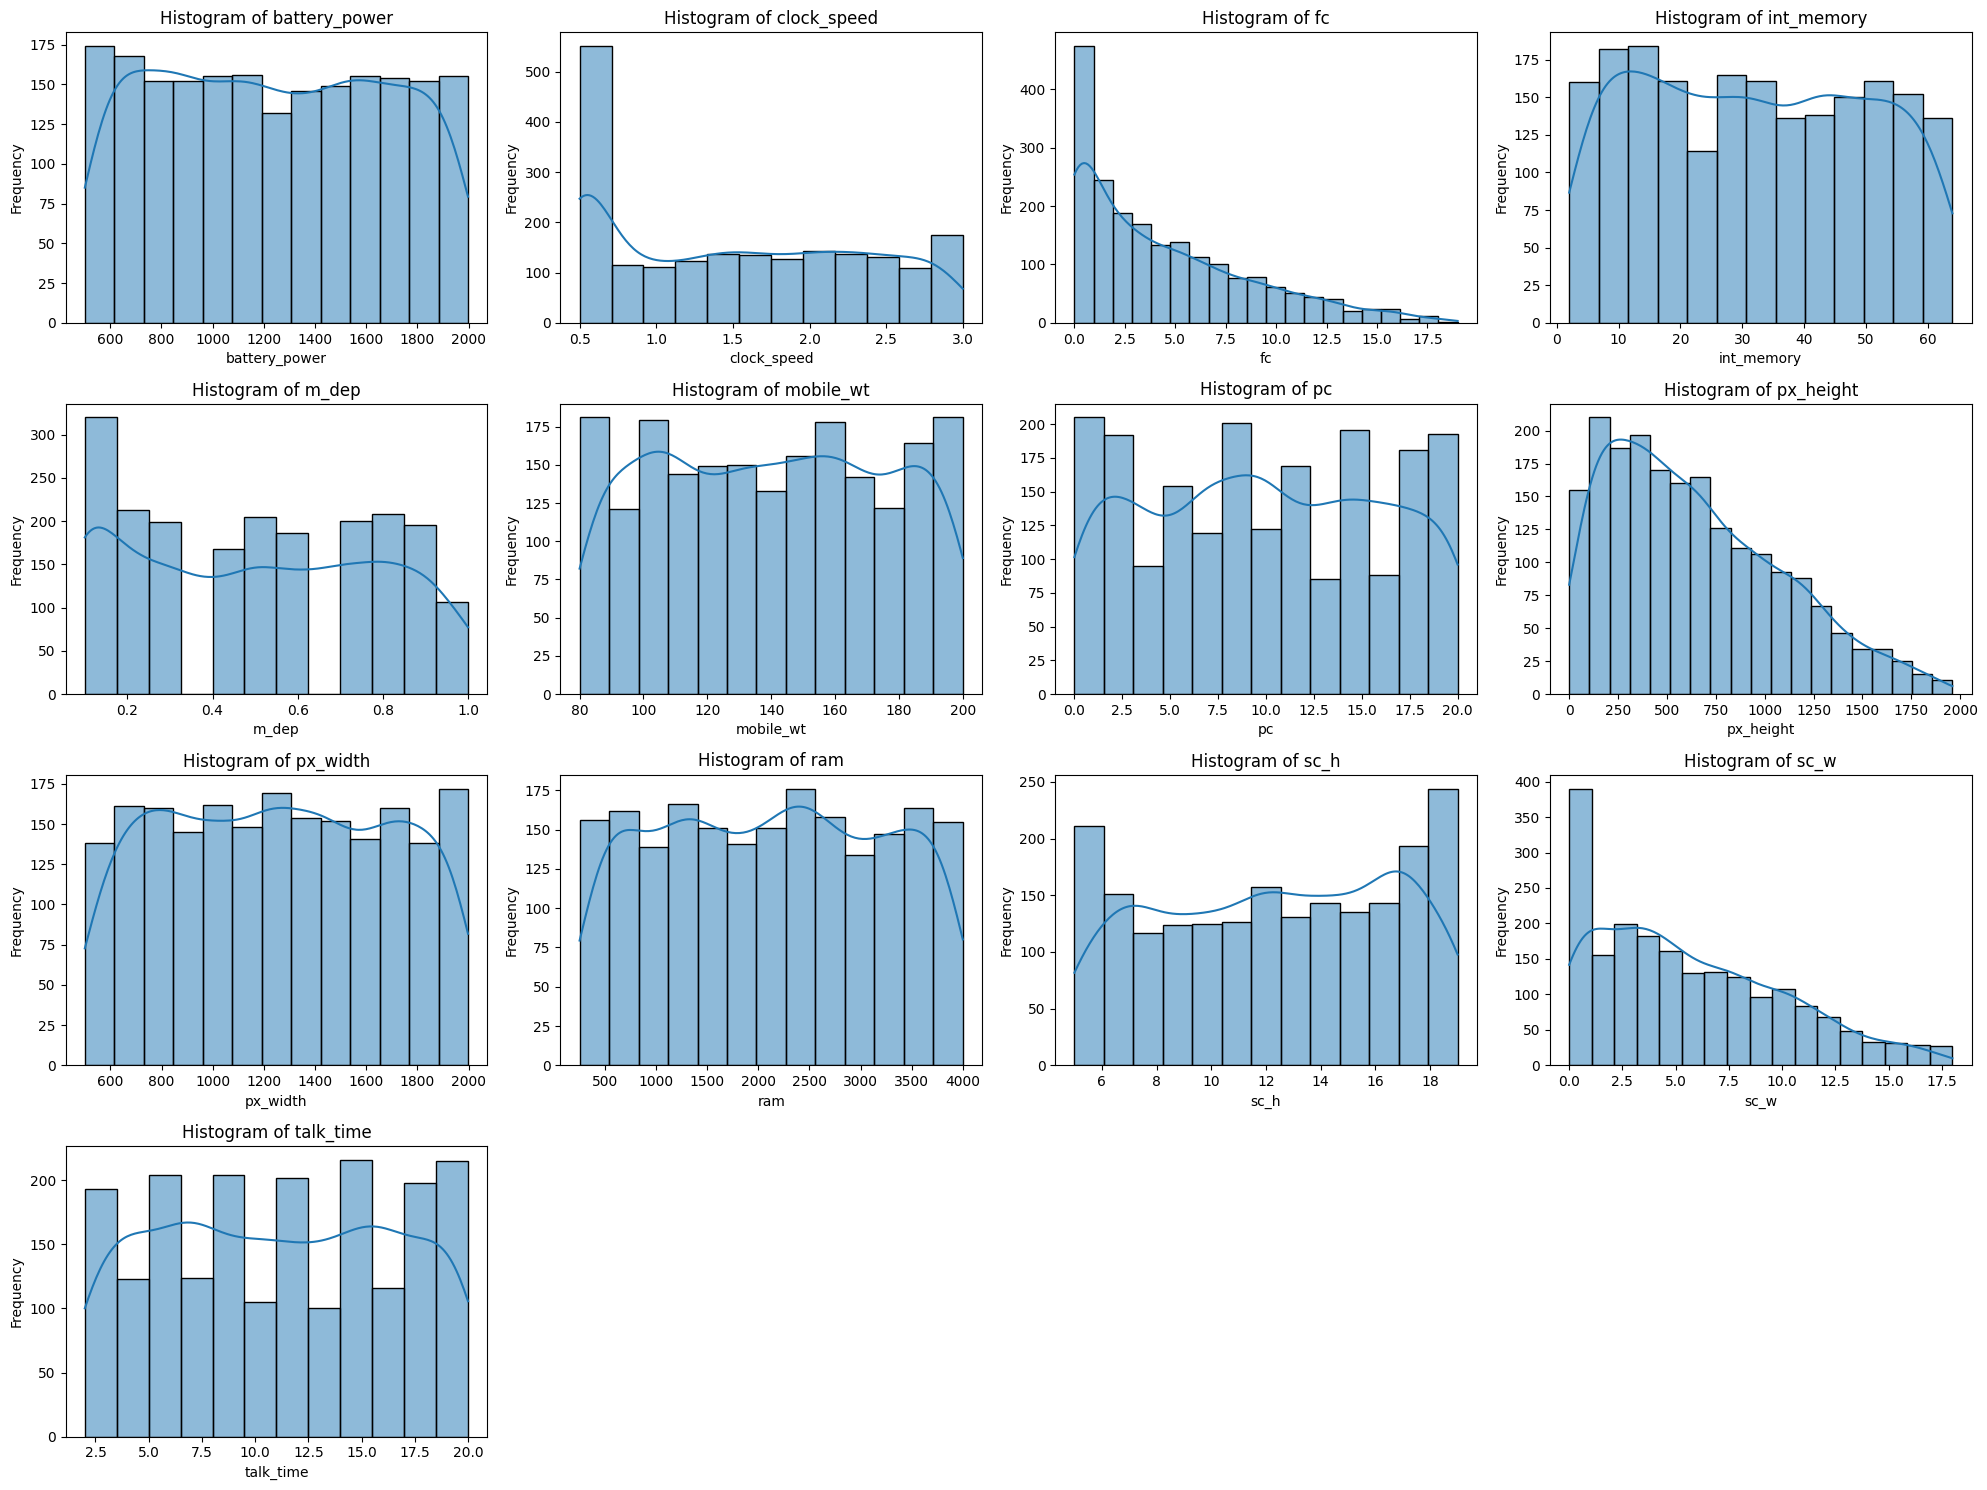

In [25]:
plt.figure(figsize=(20, 15))
num_cols = len(df_numerical.columns)
rows = (num_cols + 3) // 4  # Calculate number of rows needed for a 4-column grid

for i, column in enumerate(df_numerical.columns):
    plt.subplot(rows, 4, i + 1)
    sns.histplot(df_numerical[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Now, I will generate box plots for all numerical features in the `df_numerical` DataFrame to visualize their distributions, particularly focusing on central tendency, spread, and the presence of outliers. The plots will be arranged in a grid for readability.



/tmp/ipython-input-202126474.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_numerical[column], palette='viridis')
/tmp/ipython-input-202126474.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_numerical[column], palette='viridis')
/tmp/ipython-input-202126474.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_numerical[column], palette='viridis')
/tmp/ipython-input-202126474.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

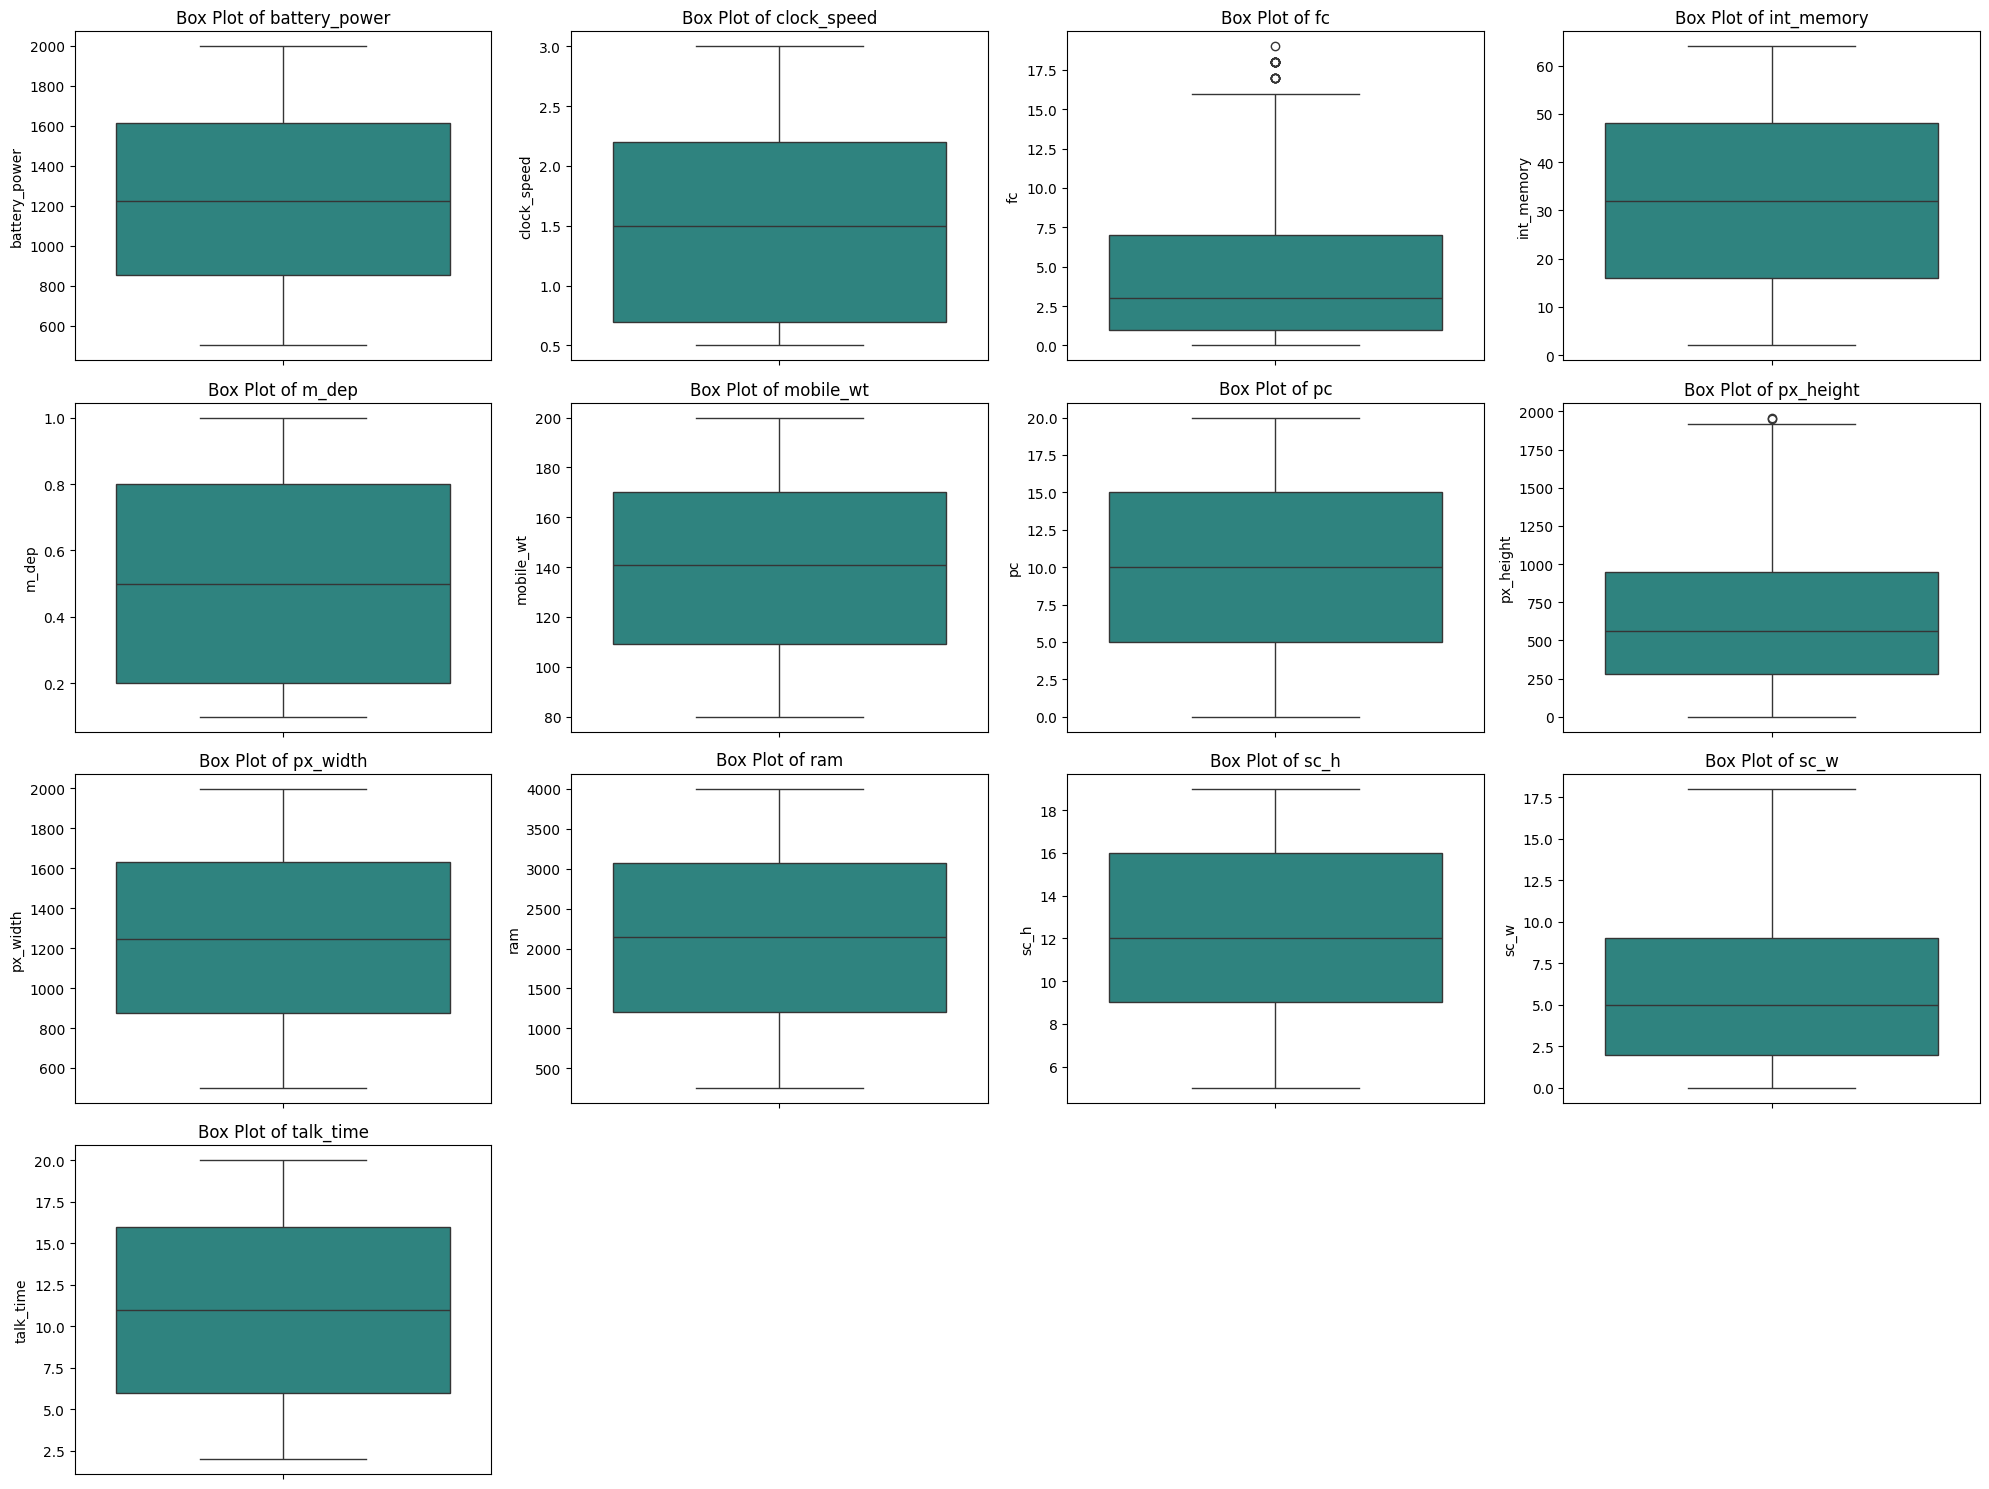

In [26]:
plt.figure(figsize=(20, 15))
num_cols = len(df_numerical.columns)
rows = (num_cols + 3) // 4  # Calculate number of rows needed for a 4-column grid

for i, column in enumerate(df_numerical.columns):
    plt.subplot(rows, 4, i + 1)
    sns.boxplot(y=df_numerical[column], palette='viridis')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


To visualize the relationships between key features, I will create three scatter plots: 'ram' vs 'price_range', 'battery_power' vs 'price_range', and 'px_width' vs 'px_height'. Each plot will have descriptive titles and axis labels.



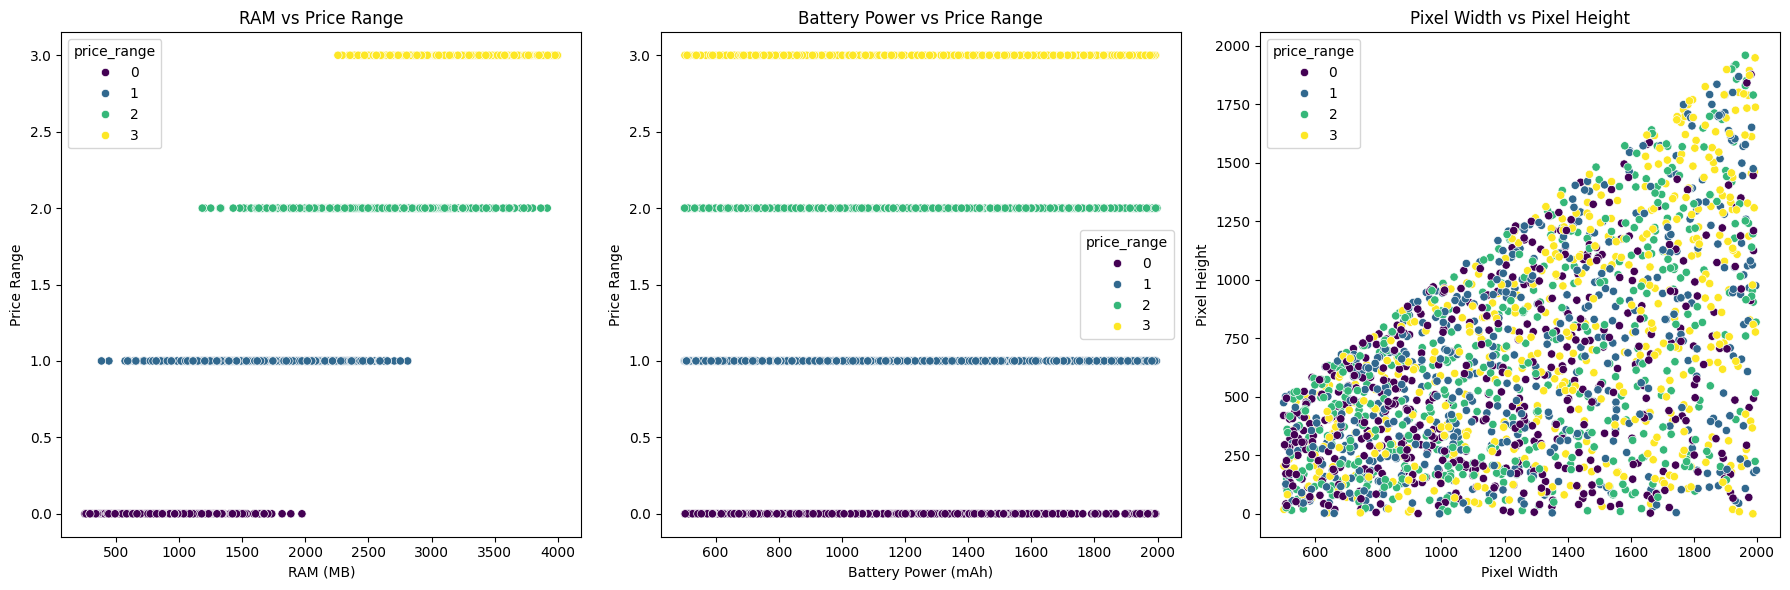

In [27]:
plt.figure(figsize=(18, 6))

# Scatter plot for RAM vs Price Range
plt.subplot(1, 3, 1)
sns.scatterplot(x='ram', y='price_range', data=train, hue='price_range', palette='viridis', legend='full')
plt.title('RAM vs Price Range')
plt.xlabel('RAM (MB)')
plt.ylabel('Price Range')

# Scatter plot for Battery Power vs Price Range
plt.subplot(1, 3, 2)
sns.scatterplot(x='battery_power', y='price_range', data=train, hue='price_range', palette='viridis', legend='full')
plt.title('Battery Power vs Price Range')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Price Range')

# Scatter plot for Pixel Width vs Pixel Height
plt.subplot(1, 3, 3)
sns.scatterplot(x='px_width', y='px_height', data=train, hue='price_range', palette='viridis', legend='full')
plt.title('Pixel Width vs Pixel Height')
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')

plt.tight_layout()
plt.show()

To visualize the correlation between all numerical features, I will compute their correlation matrix and display it as a heatmap.



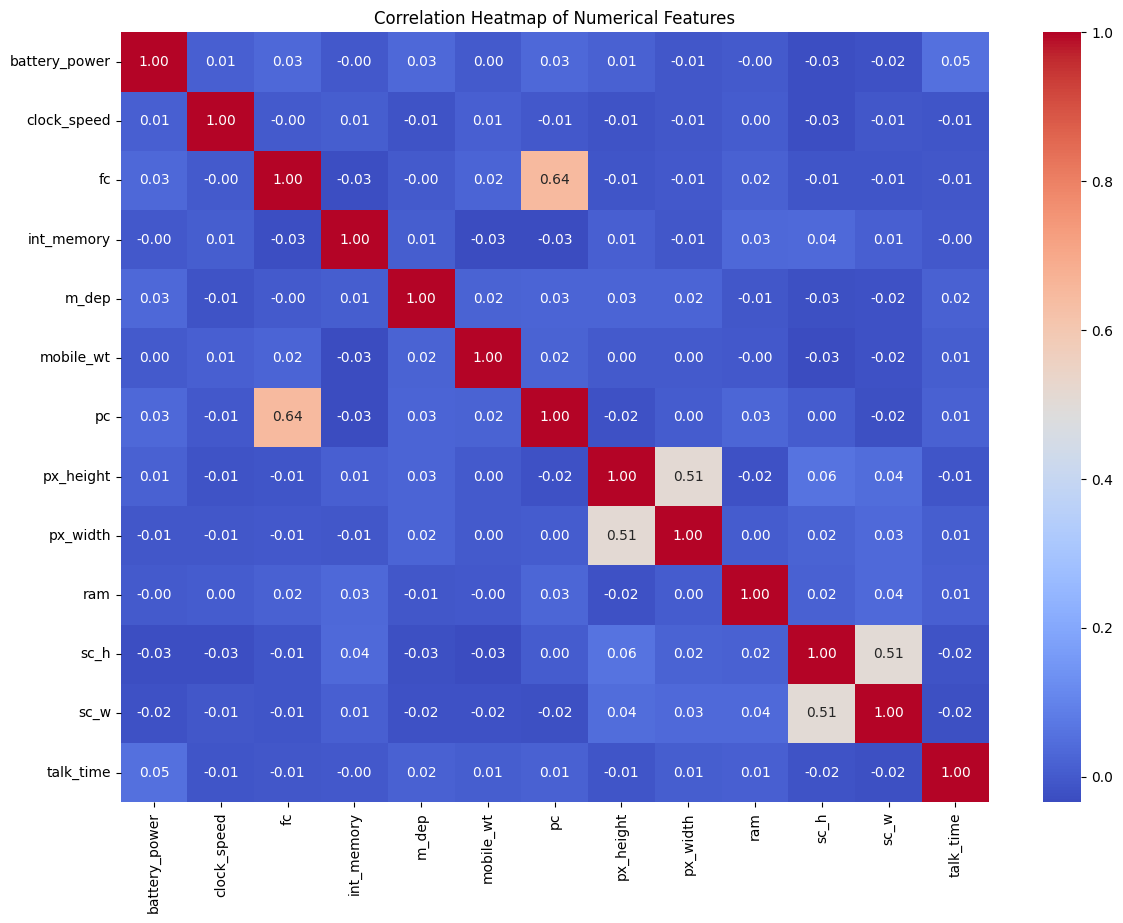

In [28]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Summary of Insights from Statistical Analysis and Visualizations

**1. Data Overview and Quality:**
*   The dataset (`train.csv`) contains 2000 entries and 21 columns, with no missing values or duplicates, indicating a clean dataset ready for analysis.
*   All features are already in numerical format (integers or floats), removing the need for categorical to numerical transformations.

**2. Statistical Measures (Central Tendency and Variability):**
*   **Battery Power (`battery_power`)**: Ranges from 501 to 1998, with a mean of 1238.5, and a standard deviation of 439.42, showing significant variability. The distribution is symmetric with very low skewness (0.03) and platykurtic (-1.22).
*   **RAM (`ram`)**: Exhibits the widest range (256 to 3998) and highest standard deviation (1084.73), suggesting substantial differences in RAM across devices. The distribution is symmetric (skewness 0.01) and platykurtic (-1.19).
*   **Pixel Dimensions (`px_height`, `px_width`)**: Both show considerable variation (std dev 443.78 and 432.20, respectively). `px_height` has a positive skew (0.67), indicating a longer tail towards higher values, while `px_width` is symmetric.
*   **Other Features**: `clock_speed`, `int_memory`, `mobile_wt`, `talk_time`, `pc`, `sc_h`, and `sc_w` generally show moderate variability and relatively symmetric distributions.
*   `fc` (Front Camera Megapixels) and `sc_w` (Screen Width) show positive skewness (1.02 and 0.63, respectively), meaning more devices have lower front camera megapixels and narrower screen widths. Their kurtosis values are relatively flat (0.28 and -0.39).

**3. Hypothesis Testing (ANOVA on RAM vs. Price Range):**
*   The One-Way ANOVA test comparing 'ram' across different 'price_range' groups yielded an F-statistic of 3520.11 and a p-value of 0.000e+00. This highly significant p-value strongly indicates that there are statistically significant differences in RAM among the different price ranges. The box plot further supported this, showing clear separation and increasing median RAM with higher price ranges.

**4. Feature-Target Correlations (Pearsonr with `price_range`):**
*   **Strong Positive Correlation:** `ram` (0.917) has an exceptionally strong positive correlation with `price_range`. This is the most significant predictor of price range.
*   **Moderate Positive Correlations:** `battery_power` (0.201), `px_width` (0.166), and `px_height` (0.149) show moderate positive correlations, indicating that higher values in these features tend to correspond to higher price ranges.
*   **Weak or Negligible Correlations:** Most other features (`blue`, `clock_speed`, `dual_sim`, `fc`, `four_g`, `int_memory`, `m_dep`, `mobile_wt`, `n_cores`, `pc`, `sc_h`, `sc_w`, `talk_time`, `three_g`, `touch_screen`, `wifi`) have very weak or negligible correlations with `price_range`, suggesting they are not strong individual predictors.

**5. Visualizations:**
*   **Histograms**: Confirmed the distribution shapes. `battery_power`, `ram`, `px_width` and `talk_time` distributions appear relatively uniform or spread out, while `fc` and `sc_w` showed peaks at lower values.
*   **Box Plots**: Highlighted the spread and presence of outliers. `px_height` shows some outliers, but generally, the distributions are well-contained within their respective ranges. The increasing median for `ram` with increasing price range was visually evident.
*   **Scatter Plots**:
    *   `ram` vs. `price_range` clearly illustrated the strong positive linear relationship, with higher RAM values almost exclusively found in higher price ranges. This visual confirmed the Pearson correlation and ANOVA results.
    *   `battery_power` vs. `price_range` showed a scattered but generally upward trend, supporting its moderate positive correlation.
    *   `px_width` vs. `px_height` displayed a positive correlation between these two dimensions, with higher pixel dimensions generally associated with higher price ranges, visible through the color encoding.
*   **Correlation Heatmap**: Visually reinforced the strong correlation of `ram` with `price_range`. It also showed that `px_height` and `px_width` are highly correlated with each other, which is expected.

In conclusion, **RAM** is overwhelmingly the most influential factor determining the price range of mobile phones in this dataset, followed by `battery_power`, `px_width`, and `px_height`.

## Summary:

### Data Analysis Key Findings

*   **Data Quality**: The dataset is clean, consisting of 2000 entries and 21 columns with no missing values or duplicates, and all features are numerical.
*   **RAM as a Dominant Predictor**: `ram` exhibits an exceptionally strong positive correlation with `price_range` (0.917). ANOVA testing confirmed statistically significant differences in RAM across different `price_range` groups (F-statistic = 3520.11, p-value = 0.000e+00), visually supported by scatter plots showing higher RAM values primarily in higher price ranges.
*   **Other Moderate Influences**: `battery_power` (0.201), `px_width` (0.166), and `px_height` (0.149) show moderate positive correlations with `price_range`. `px_height` and `px_width` are also highly correlated with each other, as expected.
*   **Feature Distributions**: Histograms revealed that `battery_power`, `ram`, `px_width`, and `talk_time` distributions are relatively uniform or spread out. `fc` (Front Camera Megapixels) and `sc_w` (Screen Width) showed positive skewness (1.02 and 0.63, respectively), indicating a higher frequency of lower values for these features. `px_height` also displayed a positive skew (0.67) and some outliers.
*   **Weak Correlations**: Most other features, such as `clock_speed`, `dual_sim`, `int_memory`, and `mobile_wt`, show very weak or negligible correlations with `price_range`, suggesting they are not strong individual predictors.

### Insights or Next Steps

*   **Insight**: RAM is the most critical feature influencing mobile phone `price_range` in this dataset, indicating its pivotal role in device valuation and market segmentation.
*   **Next Step**: Given RAM's strong influence, a more in-depth analysis of optimal RAM levels for different price tiers could be beneficial for product development or marketing strategies. Further investigation into potential interaction effects between `ram`, `battery_power`, and `px_dimensions` might reveal more complex pricing dynamics.
